In [1]:
import pandas as pd 

In [ ]:
df = pd.read_csv("../Datasets/Datasets9.2/train_jRxnrHD.csv")

andiamo a verificare se ci sono dei valori null all'interno del nostro dataframe, per provvedere a sostituirli o eliminarli

In [3]:
df.isna().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
premium                                0
target                                 0
dtype: int64

in questo caso per quanto riguarda i valori null della colonna con 3000 istanze null, non possiamo semplicemente eliminare quelle tuple in quanto influirebbero negativamente sull'esito della classificazione

per rimediare quindi andiamo ad applicare un metodo per sostituzione di valori null dentro il dataframe, in questo caso una semplice media dei valori già presenti

In [4]:
media = df["application_underwriting_score"].mean()
df["application_underwriting_score"] = df["application_underwriting_score"].fillna(media)

per quanto riguarda invece le altre due colonne con valori null, andiamo ad eliminare le tuple che presentano quei valori

In [5]:
df=df.dropna()

In [6]:
df.isna().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
premium                             0
target                              0
dtype: int64

In [7]:
df["Count_3-6_months_late"].max()

13.0

per poter ora andare ad effettuare la classificazione andiamo a sistemare i dati, andando a trasformare valori nominali in valori numerici, come ad esempio la residenza o il sourcing channel

In [8]:
df["residence_area_type"].unique()

array(['Urban', 'Rural'], dtype=object)

In [9]:
df['residence_area_type'] = pd.factorize(df['residence_area_type'])[0]

grazie all'onehotencoder andiamo a far si che i miei valori nominali Urban e Rural assumano valori booleani (0 o 1)

per i valori nominali di sourcing channel, non possiamo usare l'OneHotEncoder in quanto la colonna assume più di due valori

In [10]:
df["sourcing_channel"].unique()

array(['C', 'A', 'B', 'D', 'E'], dtype=object)

In [11]:
df['sourcing_channel'] = pd.factorize(df['sourcing_channel'])[0]

In [12]:
df["sourcing_channel"]

0        0
1        1
2        0
3        1
4        2
        ..
79848    2
79849    1
79850    1
79851    1
79852    1
Name: sourcing_channel, Length: 79756, dtype: int64

abbiamo in questo modo mappato i singoli valori nominali della colonna in valori numerici che vanno da 1 a 4

In [13]:
df["target"].unique()
df["target"].value_counts()

1    74817
0     4939
Name: target, dtype: int64

### Andiamo a calcolare la matrice di correlazione per capire quali attributi hanno maggiore valore informativo

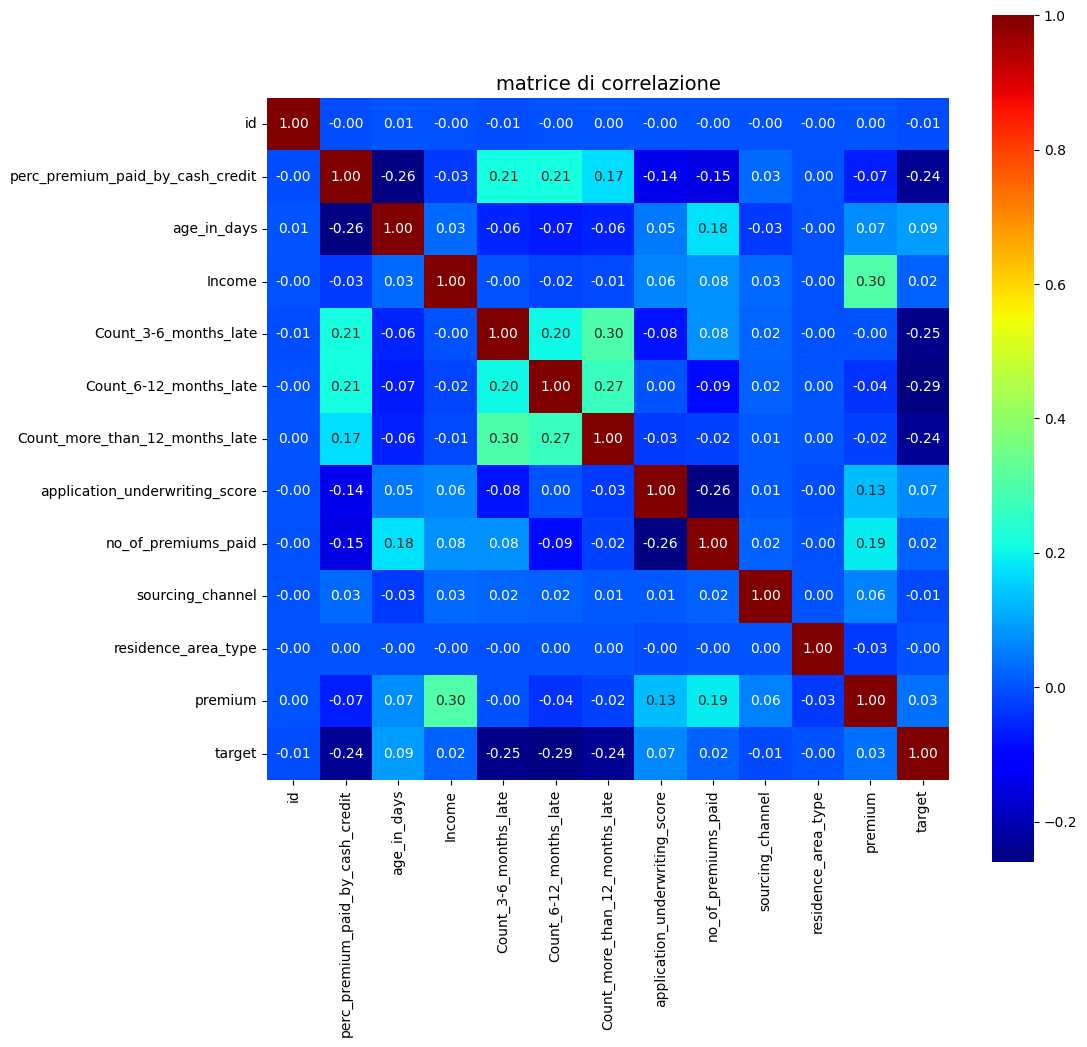

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr()
plt.figure(figsize=(11,11))
plot = sns.heatmap(corr_matrix, vmax = 1,square = True, annot=True,fmt=".2f", cmap="jet",robust = True)

plt.title("matrice di correlazione", fontsize = 14)
plt.show()

In [15]:
# df = df.drop("id",axis=1)
# df = df.drop("perc_premium_paid_by_cash_credit",axis=1)
# df = df.drop("Count_3-6_months_late",axis=1)
# df = df.drop("Count_6-12_months_late",axis=1)
# df = df.drop("Count_more_than_12_months_late",axis=1)
# df = df.drop("sourcing_channel",axis=1)

# import matplotlib.pyplot as plt
# import seaborn as sns

# corr_matrix = df.corr()
# plt.figure(figsize=(15,15))
# plot = sns.heatmap(corr_matrix, vmax = 1,square = True, annot=True,fmt=".2f", cmap="jet",robust = True)

# plt.title("matrice di correlazione", fontsize = 14)
# plt.show()

### possiamo ora effettuare la classificazione tramite Decision Tree

In [16]:
test = pd.read_csv("./Datasets9.2/test_QaJU1Mh.csv")
test["residence_area_type"] = test["residence_area_type"].map({"Urban":0,"Rural":1})
test["sourcing_channel"] = test["sourcing_channel"].map({"A":1,"B":2,"C":3,"D":4,"E":5})

In [17]:
test = test.dropna(axis=0)

In [18]:
test.isna().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
dtype: int64

##########################################################################
Nearest Neighbors
0.9262788365095286
Accuracy: 0.93
----------------------------------
AUC-ROC score: 0.5011572577222496
----------------------------------
Precision (numero di istanze correttamente predette dal modello):

0.9385133846251669
----------------------------------
Recall (true positive rate):

0.9860378114770526
----------------------------------
F-score (mette in relazione precision e recall in un'unica metrica, facendone la media):

0.9616888193901485
----------------------------------
Confusion Matrix:

[[   16   967]
 [  209 14760]]
----------------------------------
Cross accuracy: 0.92673904180726
Cross precision: 0.5081458680234727
Cross recall: 0.5018064465805441
Cross f_score: 0.4947863354991922


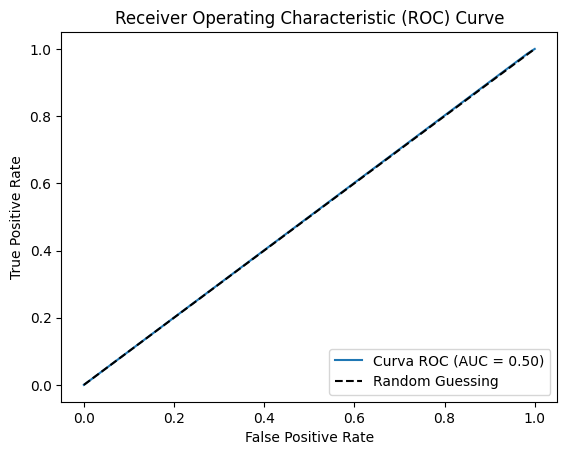

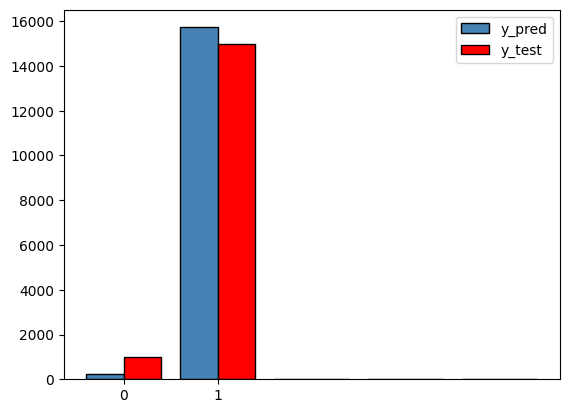

##########################################################################
Decision Tree
0.9395687061183551
Accuracy: 0.94
----------------------------------
AUC-ROC score: 0.5586144902924844
----------------------------------
Precision (numero di istanze correttamente predette dal modello):

0.9452533858968653
----------------------------------
Recall (true positive rate):

0.9931191128331885
----------------------------------
F-score (mette in relazione precision e recall in un'unica metrica, facendone la media):

0.968595256710972
----------------------------------
Confusion Matrix:

[[  122   861]
 [  103 14866]]
----------------------------------
Cross accuracy: 0.9393525154172316
Cross precision: 0.7480335469769045
Cross recall: 0.5492855808043743
Cross f_score: 0.5711684593308191


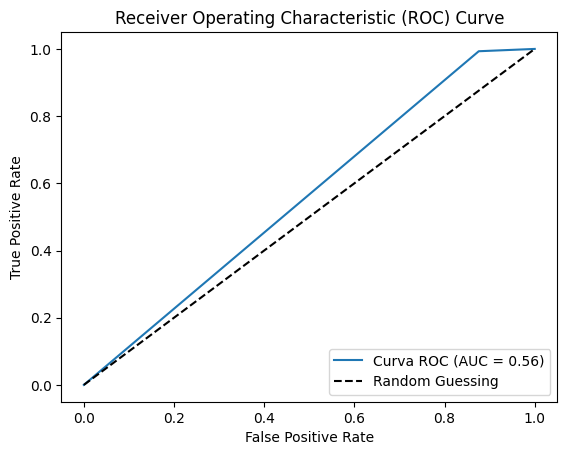

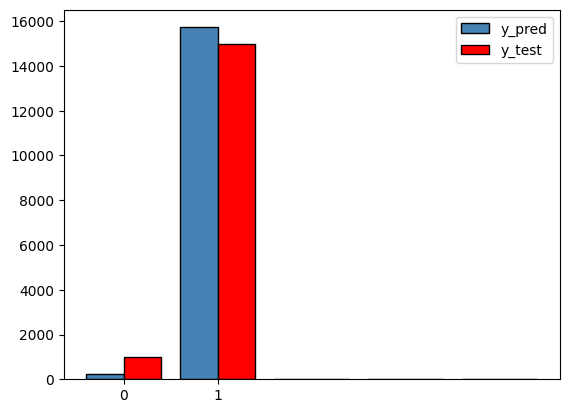

##########################################################################
Random Forest
0.9383776328986961
Accuracy: 0.94
----------------------------------
AUC-ROC score: 0.5
----------------------------------
Precision (numero di istanze correttamente predette dal modello):

0.9383776328986961
----------------------------------
Recall (true positive rate):

1.0
----------------------------------
F-score (mette in relazione precision e recall in un'unica metrica, facendone la media):

0.9682093075903108
----------------------------------
Confusion Matrix:

[[    0   983]
 [    0 14969]]
----------------------------------


C:\Users\renat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\renat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross accuracy: 0.9380987014708472
Cross precision: 0.6690485752413509
Cross recall: 0.5002025316974924
Cross f_score: 0.4844346464597745


C:\Users\renat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


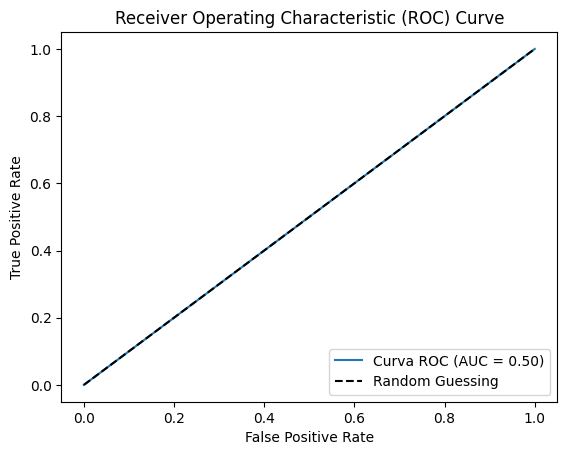

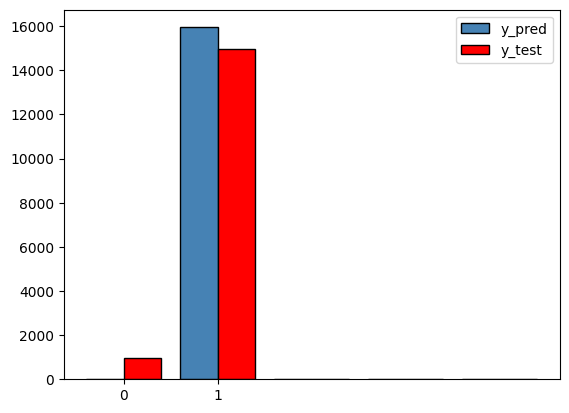

##########################################################################
Naive Bayes
0.49498495486459376
Accuracy: 0.49
----------------------------------
AUC-ROC score: 0.5303573128786266
----------------------------------
Precision (numero di istanze correttamente predette dal modello):

0.945597524816295
----------------------------------
Recall (true positive rate):

0.49001269289865723
----------------------------------
F-score (mette in relazione precision e recall in un'unica metrica, facendone la media):

0.6455161489043386
----------------------------------
Confusion Matrix:

[[ 561  422]
 [7634 7335]]
----------------------------------
Cross accuracy: 0.49462104182901656
Cross precision: 0.5084497997399131
Cross recall: 0.5363269678628816
Cross f_score: 0.3849258214686306


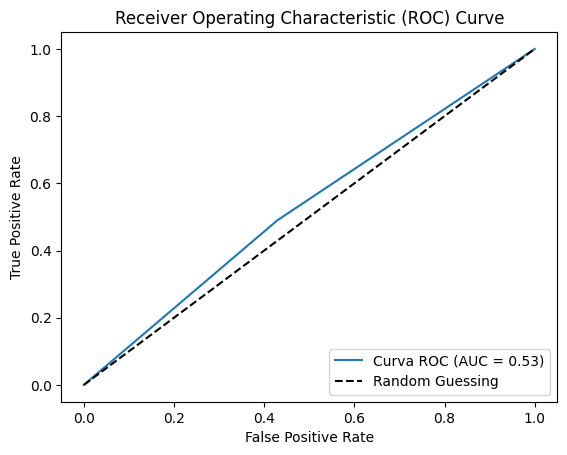

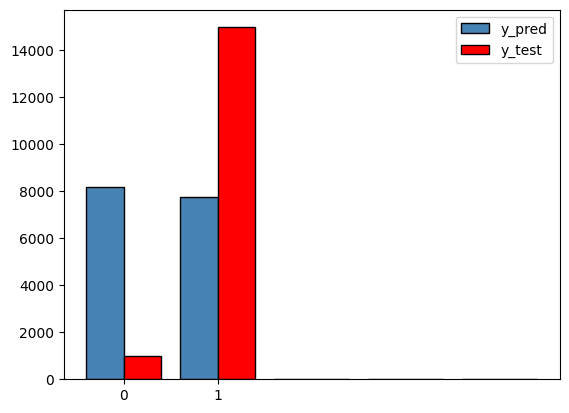

In [19]:
from sklearn.model_selection import train_test_split
# classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB as NB
#metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

#cross validation
from sklearn.model_selection import cross_validate


x = df.drop("target",axis=1)
y = df["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle = True)

names = ["Nearest Neighbors", "Decision Tree","Random Forest", "Naive Bayes"]
# , "Linear SVM"

classifiers = [KNeighborsClassifier(3),
               # SVC(kernel="linear", C=0.025),
               DecisionTreeClassifier(max_depth=5),
               RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
               NB()]

for name, clf in zip(names, classifiers):
    print("##########################################################################")
    print(name)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(accuracy_score(y_test, y_pred))
    print("Accuracy: %0.2f" % accuracy_score(y_test, y_pred))
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    print("----------------------------------")
    print("AUC-ROC score:", auc_roc)
    print("----------------------------------")
    
    print("Precision (numero di istanze correttamente predette dal modello):\n")
    precision = precision_score(y_test, y_pred)
    print(precision)
    print("----------------------------------")

    
    print("Recall (true positive rate):\n")
    recall = recall_score(y_test, y_pred)
    print(recall)
    print("----------------------------------")
    
    print("F-score (mette in relazione precision e recall in un'unica metrica, facendone la media):\n")
    f1 = f1_score(y_test, y_pred)
    print(f1)
    print("----------------------------------")
    
    print("Confusion Matrix:\n")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print("----------------------------------")
    
    #Eseguo cross-validation per 'migliorare' il classificatore
    scoring = {'precision':'precision_macro', 'recall':'recall_macro', 'f1_score':'f1_macro', 'accuracy':'accuracy'}
    score = cross_validate(clf, x, y, scoring=scoring)
    cross_precision = score['test_precision'].mean()
    cross_accuracy = score['test_accuracy'].mean()
    cross_f_score = score['test_f1_score'].mean()
    cross_recall = score['test_recall'].mean()
    
    #Stampiamo le metriche della cross validation
    print('Cross accuracy:',cross_accuracy)
    print('Cross precision:',cross_precision)
    print('Cross recall:',cross_recall)
    print('Cross f_score:',cross_f_score)

    # Plot the ROC curve
    # plt.plot(fpr, tpr, label='ROC curve')
    # plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.plot(fpr, tpr, label='Curva ROC (AUC = %0.2f)' % auc_roc)
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
    
    plt.hist([y_pred,y_test],  bins=[0,1,2,3,4,5], label = ["y_pred","y_test"], align = "left",color=['steelblue',"red"], edgecolor='black')
    plt.xticks([0,1])
    plt.yscale("linear")
    plt.legend()
    plt.show()

##########################################################################
Nearest Neighbors
0.528012048192771
Accuracy: 0.53
----------------------------------
AUC-ROC score: 0.5280120481927711
----------------------------------
Precision (numero di istanze correttamente predette dal modello):

0.5186622073578595
----------------------------------
Recall (true positive rate):

0.7785140562248996
----------------------------------
F-score (mette in relazione precision e recall in un'unica metrica, facendone la media):

0.6225612203934162
----------------------------------
Confusion Matrix:

[[ 4146 10794]
 [ 3309 11631]]
----------------------------------
Cross accuracy: 0.92673904180726
Cross precision: 0.5081458680234727
Cross recall: 0.5018064465805441
Cross f_score: 0.4947863354991922


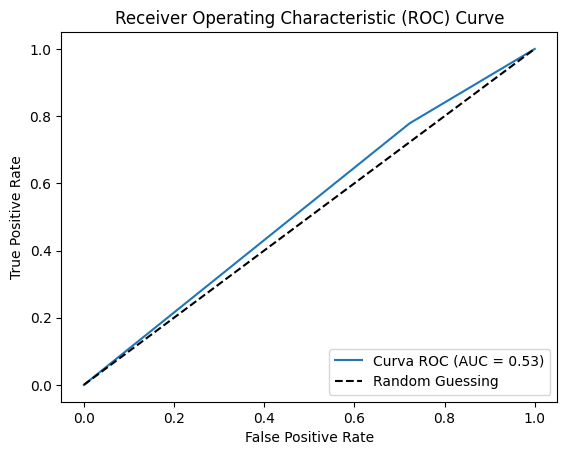

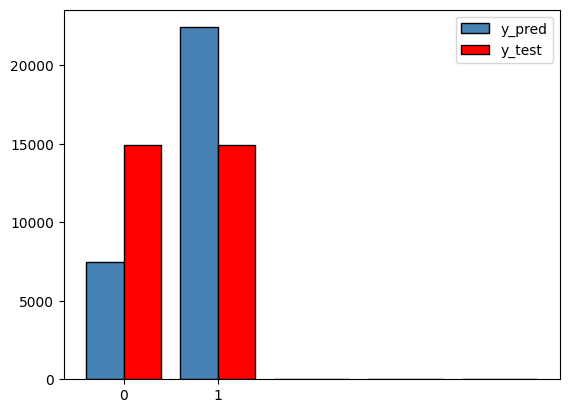

##########################################################################
Decision Tree
0.8854082998661312
Accuracy: 0.89
----------------------------------
AUC-ROC score: 0.8854082998661311
----------------------------------
Precision (numero di istanze correttamente predette dal modello):

0.8309956311795815
----------------------------------
Recall (true positive rate):

0.9676037483266399
----------------------------------
F-score (mette in relazione precision e recall in un'unica metrica, facendone la media):

0.8941118258287977
----------------------------------
Confusion Matrix:

[[12000  2940]
 [  484 14456]]
----------------------------------
Cross accuracy: 0.9393525154172316
Cross precision: 0.7480335469769045
Cross recall: 0.5492855808043743
Cross f_score: 0.5711684593308191


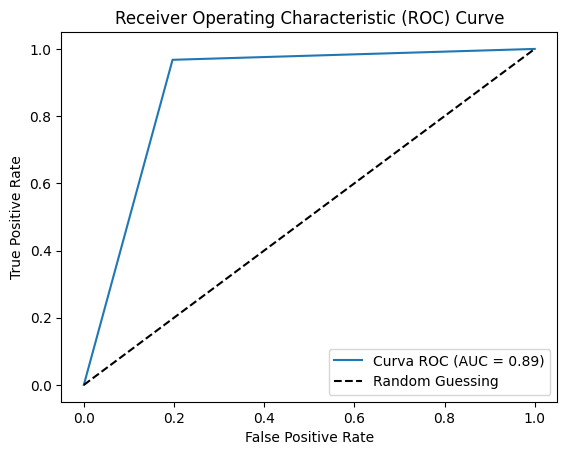

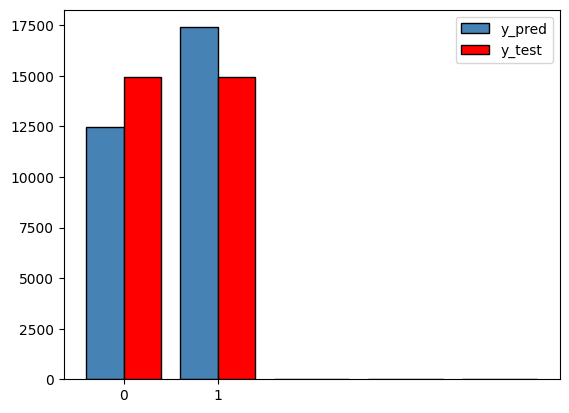

##########################################################################
Random Forest
0.8353413654618473
Accuracy: 0.84
----------------------------------
AUC-ROC score: 0.8353413654618473
----------------------------------
Precision (numero di istanze correttamente predette dal modello):

0.8506929861402772
----------------------------------
Recall (true positive rate):

0.8134538152610442
----------------------------------
F-score (mette in relazione precision e recall in un'unica metrica, facendone la media):

0.831656743995073
----------------------------------
Confusion Matrix:

[[12807  2133]
 [ 2787 12153]]
----------------------------------


C:\Users\renat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\renat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\renat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\U

Cross accuracy: 0.9381112398696937
Cross precision: 0.5242984344513817
Cross recall: 0.5015325522253137
Cross f_score: 0.48717695172570225


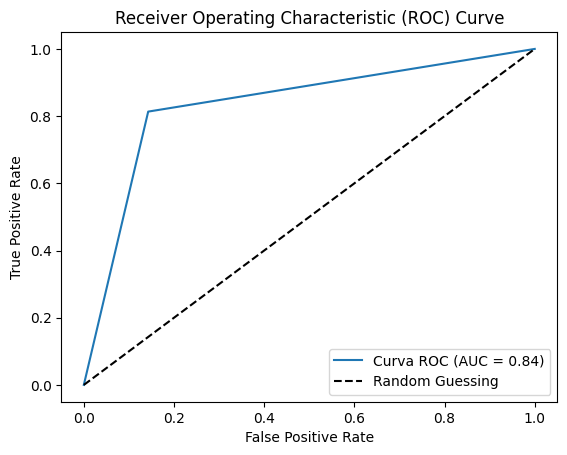

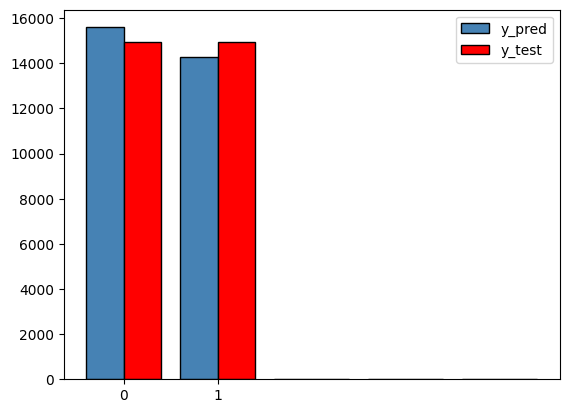

##########################################################################
Naive Bayes
0.5393239625167336
Accuracy: 0.54
----------------------------------
AUC-ROC score: 0.5393239625167336
----------------------------------
Precision (numero di istanze correttamente predette dal modello):

0.5443630597296685
----------------------------------
Recall (true positive rate):

0.4825301204819277
----------------------------------
F-score (mette in relazione precision e recall in un'unica metrica, facendone la media):

0.511584998048469
----------------------------------
Confusion Matrix:

[[8906 6034]
 [7731 7209]]
----------------------------------
Cross accuracy: 0.49462104182901656
Cross precision: 0.5084497997399131
Cross recall: 0.5363269678628816
Cross f_score: 0.3849258214686306


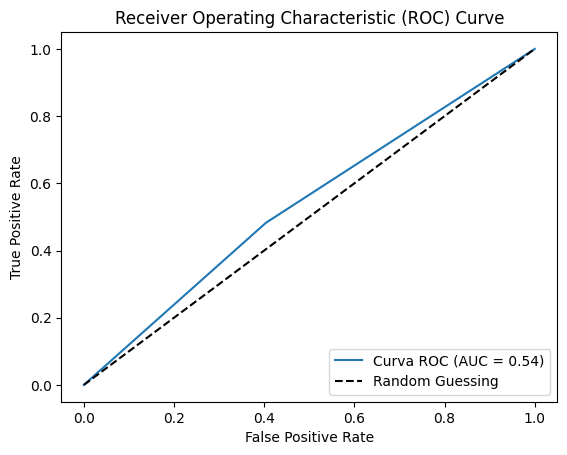

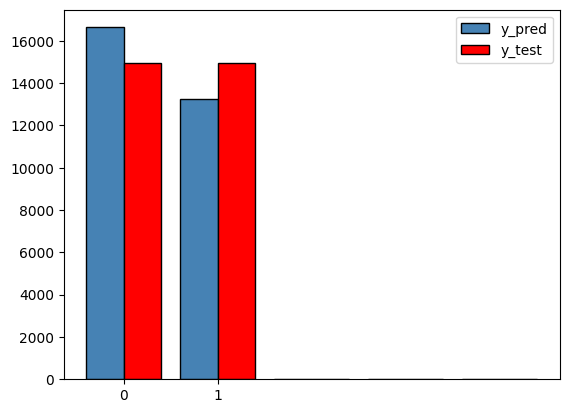

In [20]:
from sklearn.model_selection import train_test_split
# classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB as NB
#metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

#SMOTE
from imblearn.over_sampling import SMOTE

#cross validation
from sklearn.model_selection import cross_validate


x = df.drop("target",axis=1)
y = df["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle = True)

smote = SMOTE(random_state = 3)
x_train,y_train = smote.fit_resample(x_train,y_train)
x_test,y_test = smote.fit_resample(x_test,y_test)

names = ["Nearest Neighbors", "Decision Tree","Random Forest", "Naive Bayes"]
# , "Linear SVM"

classifiers = [KNeighborsClassifier(3),
               # SVC(kernel="linear", C=0.025),
               DecisionTreeClassifier(max_depth=5),
               RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
               NB()]

for name, clf in zip(names, classifiers):
    print("##########################################################################")
    print(name)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(accuracy_score(y_test, y_pred))
    print("Accuracy: %0.2f" % accuracy_score(y_test, y_pred))
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    print("----------------------------------")
    print("AUC-ROC score:", auc_roc)
    print("----------------------------------")
    
    print("Precision (numero di istanze correttamente predette dal modello):\n")
    precision = precision_score(y_test, y_pred)
    print(precision)
    print("----------------------------------")

    
    print("Recall (true positive rate):\n")
    recall = recall_score(y_test, y_pred)
    print(recall)
    print("----------------------------------")
    
    print("F-score (mette in relazione precision e recall in un'unica metrica, facendone la media):\n")
    f1 = f1_score(y_test, y_pred)
    print(f1)
    print("----------------------------------")
    
    print("Confusion Matrix:\n")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print("----------------------------------")
    
    #Eseguo cross-validation per 'migliorare' il classificatore
    scoring = {'precision':'precision_macro', 'recall':'recall_macro', 'f1_score':'f1_macro', 'accuracy':'accuracy'}
    score = cross_validate(clf, x, y, scoring=scoring)
    cross_precision = score['test_precision'].mean()
    cross_accuracy = score['test_accuracy'].mean()
    cross_f_score = score['test_f1_score'].mean()
    cross_recall = score['test_recall'].mean()
    
    #Stampiamo le metriche della cross validation
    print('Cross accuracy:',cross_accuracy)
    print('Cross precision:',cross_precision)
    print('Cross recall:',cross_recall)
    print('Cross f_score:',cross_f_score)

    # Plot the ROC curve
    # plt.plot(fpr, tpr, label='ROC curve')
    # plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.plot(fpr, tpr, label='Curva ROC (AUC = %0.2f)' % auc_roc)
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
    
    plt.hist([y_pred,y_test],  bins=[0,1,2,3,4,5], label = ["y_pred","y_test"], align = "left",color=['steelblue',"red"], edgecolor='black')
    plt.xticks([0,1])
    plt.yscale("linear")
    plt.legend()
    plt.show()

